In [25]:
from utils import *
import pandas as pd
import mne
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import normalize, StandardScaler
# %matplotlib widget

In [26]:
task = 'stroop'
condition = 'control'
# condition = 'stress'

In [27]:
# start : begin of question
# T: answer correct
# F: answer incorrect
# S: not answer in time
# O: unexpected key press
marker_names = [0,
            f'{task},LowStress,start',
            f'{task},LowStress,T',
            f'{task},LowStress,F',
            f'{task},LowStress,S',
            f'{task},LowStress,O',
            f'{task},MildStress,start',
            f'{task},MildStress,T',
            f'{task},MildStress,F',
            f'{task},MildStress,S',
            f'{task},MildStress,O',
            f'{task},HigherStress,start',
            f'{task},HigherStress,T',
            f'{task},HigherStress,F',
            f'{task},HigherStress,S',
            f'{task},HigherStress,O',
            'fixation,None,None']

In [28]:
files = glob(f"data/*_{task}{condition}_*.csv")
names = []
pd_raws = []
raws = []
with tqdm(files) as pbar:
    for index, f in enumerate(pbar):
        name, _, t_stamp = f.split('/')[1].split('_')
        names.append(name)
        pbar.set_description(f"{index} {name}")
        pd_raw = pd.read_csv(f, dtype={'Marker':str})
        pd_raw = marker_converter(pd_raw,marker_names)
        pd_raws.append(pd_raw)

print(f"index\tname\tfile_name")
print("="*30)
for index in range(len(names)):
    print(f"{index}\t{names[index]}\t{files[index]}")

  0%|          | 0/7 [00:00<?, ?it/s]

index	name	file_name
0	dusadee	data/dusadee_stroopcontrol_2021-08-12-05.51.23.csv
1	nuttasit	data/nuttasit_stroopcontrol_2021-08-12-08.29.17.csv
2	surangrat	data/surangrat_stroopcontrol_2021-08-12-04.18.40.csv
3	prin	data/prin_stroopcontrol_2021-08-13-06.54.25.csv
4	pumpath	data/pumpath_stroopcontrol_2021-08-12-03.38.14.csv
5	nutcha	data/nutcha_stroopcontrol_2021-08-10-11.28.49.csv
6	krittithee	data/krittithee_stroopcontrol_2021-08-13-05.12.44.csv


In [29]:
with tqdm(pd_raws) as pbar:
    for index, pd_raw in enumerate(pbar):
        # if(index == 0): continue
        pbar.set_description(f"{index} {names[index]}")
        marker = pd_raw['Marker'].copy()
        # print(marker[marker != '0'].to_string())
        # for m in marker[marker != 0]:
        #     print(m)
        # break
        print(f"Participant:'{names[index]}'")
        print(f"Number of LowStress: {sum(marker == marker_names.index(f'{task},LowStress,start'))}")
        print(f"\tcorrect: {sum(marker == marker_names.index(f'{task},LowStress,T'))}")
        print(f"\tincorrect: {sum(marker == marker_names.index(f'{task},LowStress,F'))}")
        print(f"\tslow: {sum(marker == marker_names.index(f'{task},LowStress,S'))}")
        print(f"\tout of range: {sum(marker == marker_names.index(f'{task},LowStress,O'))}")

        print(f"Number of MildStress: {sum(marker == marker_names.index(f'{task},MildStress,start'))}")
        print(f"\tcorrect: {sum(marker == marker_names.index(f'{task},MildStress,T'))}")
        print(f"\tincorrect: {sum(marker == marker_names.index(f'{task},MildStress,F'))}")
        print(f"\tslow: {sum(marker == marker_names.index(f'{task},MildStress,S'))}")
        print(f"\tout of range: {sum(marker == marker_names.index(f'{task},MildStress,O'))}")
        
        print(f"Number of HigherStress: {sum(marker == marker_names.index(f'{task},HigherStress,start'))}")
        print(f"\tcorrect: {sum(marker == marker_names.index(f'{task},HigherStress,T'))}")
        print(f"\tincorrect: {sum(marker == marker_names.index(f'{task},HigherStress,F'))}")
        print(f"\tslow: {sum(marker == marker_names.index(f'{task},HigherStress,S'))}")
        print(f"\tout of range: {sum(marker == marker_names.index(f'{task},HigherStress,O'))}")
        print(f"="*30)

        marker[marker == marker_names.index(f'{task},LowStress,T')] = 0
        marker[marker == marker_names.index(f'{task},LowStress,F')] = 0
        marker[marker == marker_names.index(f'{task},LowStress,S')] = 0
        marker[marker == marker_names.index(f'{task},LowStress,O')] = 0

        marker[marker == marker_names.index(f'{task},MildStress,T')] = 0
        marker[marker == marker_names.index(f'{task},MildStress,F')] = 0
        marker[marker == marker_names.index(f'{task},MildStress,S')] = 0
        marker[marker == marker_names.index(f'{task},MildStress,O')] = 0

        marker[marker == marker_names.index(f'{task},HigherStress,T')] = 0
        marker[marker == marker_names.index(f'{task},HigherStress,F')] = 0
        marker[marker == marker_names.index(f'{task},HigherStress,S')] = 0
        marker[marker == marker_names.index(f'{task},HigherStress,O')] = 0
        pd_raw['Marker'] = marker

  0%|          | 0/7 [00:00<?, ?it/s]

Participant:'dusadee'
Number of LowStress: 51
	correct: 23
	incorrect: 0
	slow: 0
	out of range: 0
Number of MildStress: 35
	correct: 15
	incorrect: 1
	slow: 0
	out of range: 0
Number of HigherStress: 41
	correct: 23
	incorrect: 1
	slow: 0
	out of range: 0
Participant:'nuttasit'
Number of LowStress: 39
	correct: 16
	incorrect: 0
	slow: 0
	out of range: 0
Number of MildStress: 35
	correct: 18
	incorrect: 1
	slow: 0
	out of range: 0
Number of HigherStress: 36
	correct: 22
	incorrect: 0
	slow: 0
	out of range: 0
Participant:'surangrat'
Number of LowStress: 48
	correct: 22
	incorrect: 0
	slow: 0
	out of range: 0
Number of MildStress: 46
	correct: 15
	incorrect: 1
	slow: 0
	out of range: 0
Number of HigherStress: 41
	correct: 21
	incorrect: 1
	slow: 0
	out of range: 0
Participant:'prin'
Number of LowStress: 36
	correct: 13
	incorrect: 1
	slow: 0
	out of range: 0
Number of MildStress: 49
	correct: 0
	incorrect: 29
	slow: 0
	out of range: 0
Number of HigherStress: 48
	correct: 0
	incorrect: 3

In [30]:
raws = []
sampling_rate = 250 # Hz
with tqdm(pd_raws) as pbar:
    for index,pd_raw in enumerate(pbar):
        pbar.set_description(f"{index} {names[index]}")
        raw = dataframe_to_raw(pd_raw, sfreq=sampling_rate)
        raws.append(raw)

  0%|          | 0/7 [00:00<?, ?it/s]

In [31]:
raw = raws[1].copy()

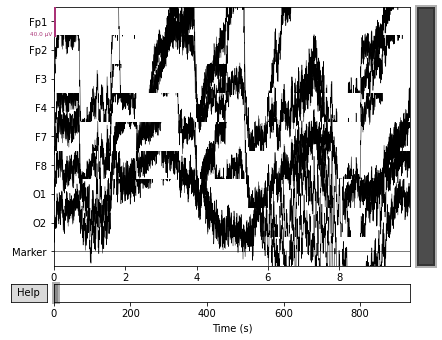

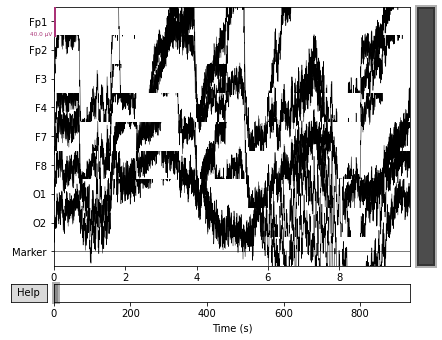

In [32]:
raw.plot()

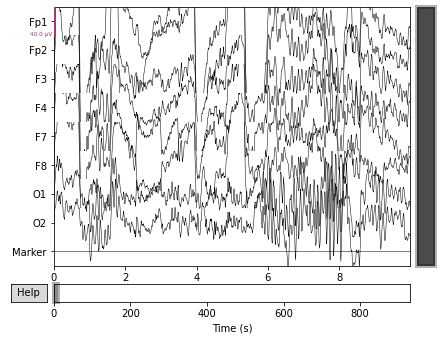

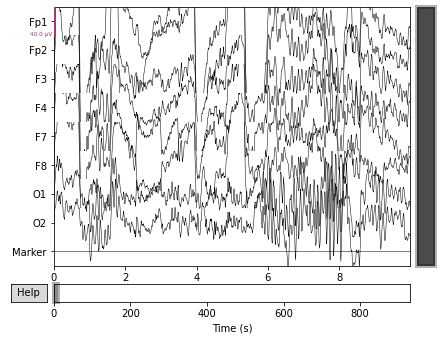

In [33]:
raw.filter(l_freq=0.5,h_freq=30.0, method='iir', iir_params={'order':3.0, 'ftype':'butter'}, verbose=False) # Slow drift
raw.plot()

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 2.2s.
Creating RawArray with float64 data, n_channels=8, n_times=232716
    Range : 0 ... 232715 =      0.000 ...   930.860 secs
Ready.


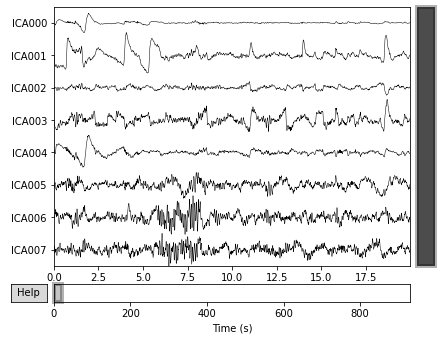

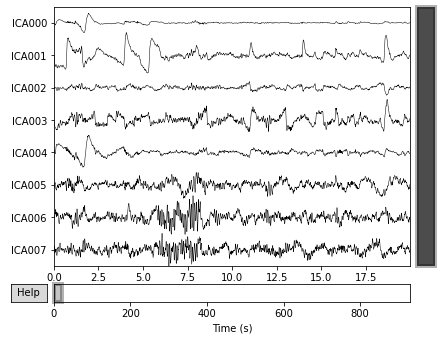

In [34]:
ica = mne.preprocessing.ICA(n_components=8, max_iter='auto')
ica.fit(raw)
ica.plot_sources(raw)
# raw = ica.apply(raw)

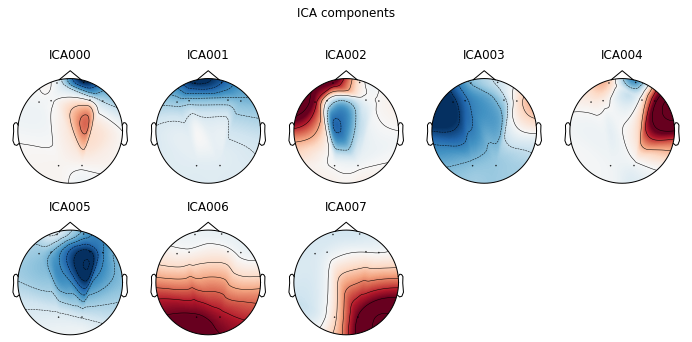

[<MNEFigure size 702x357.12 with 8 Axes>]

In [35]:
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
465 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
465

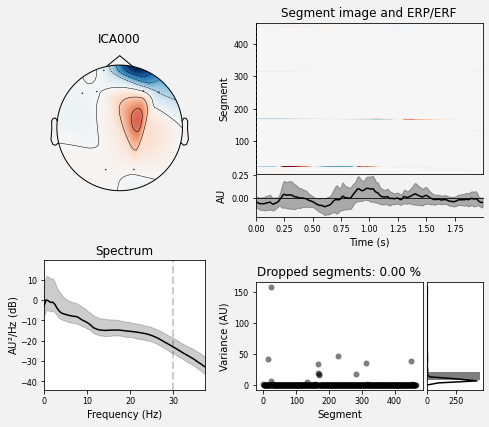

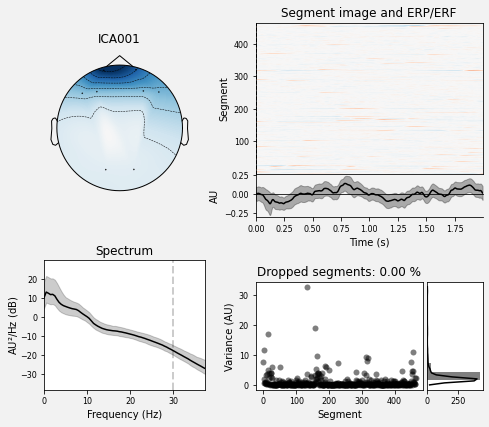

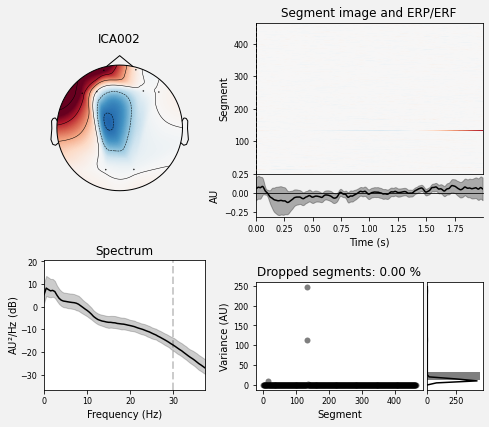

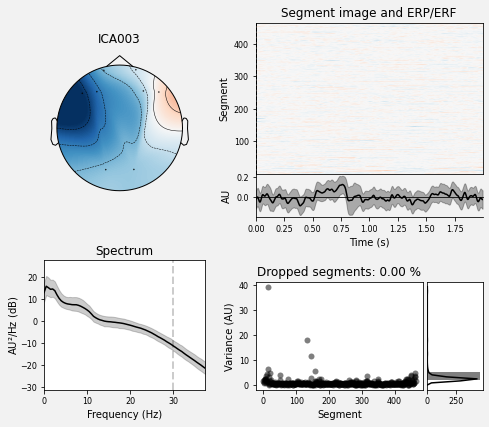

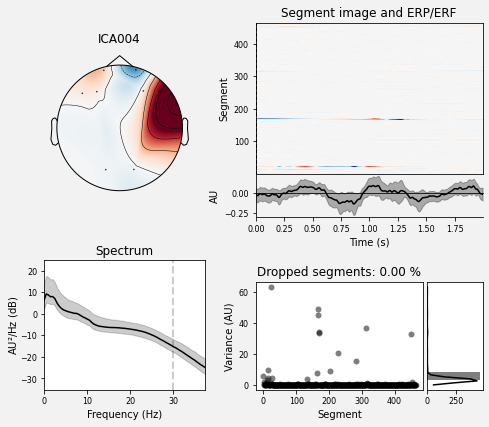

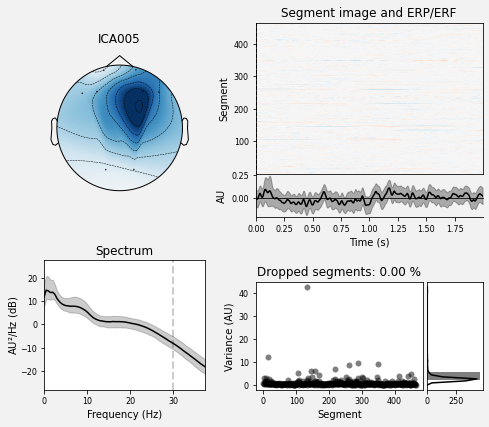

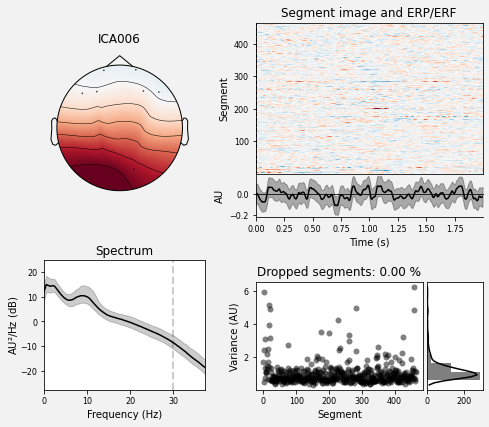

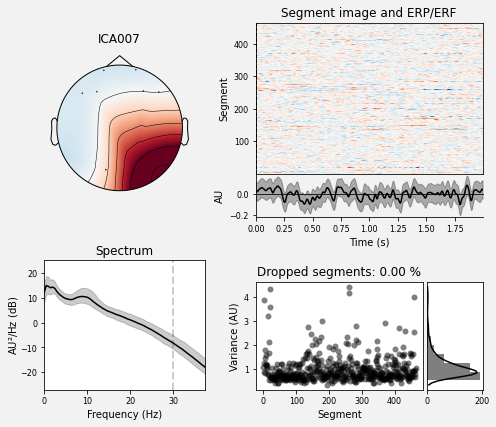

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [36]:
ica.plot_properties(raw, picks=[0, 1, 2, 3,4,5,6,7])